In [1]:
import pandas as pd

C:\Users\kerim\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_excel('hackathon 2024 - Yapay Zeka.xlsx')

data['TIME_STAMP'] = pd.to_datetime(data['TIME_STAMP'])
data.head()

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701


In [3]:
data.describe()

,TIME_STAMP,DOWNLOAD,UPLOAD
count,35429,35427.000000,35427.000000
mean,2024-01-03 13:59:16.925117696,19052.251090,482.140941
min,2023-11-02 10:10:00,2335.885000,57.749000
25%,2023-12-03 12:05:00,11342.646000,264.406500
50%,2024-01-03 13:55:00,18816.920000,475.543000
75%,2024-02-03 15:45:00,26627.177000,668.998000
max,2024-03-05 18:25:00,43930.614000,1670.995000
std,NaN,10213.032412,267.930799


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35429 entries, 0 to 35428
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TIME_STAMP   35429 non-null  datetime64[ns]
 1   SERVER_NAME  35429 non-null  object        
 2   DOWNLOAD     35427 non-null  float64       
 3   UPLOAD       35427 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.1+ MB


# Veri Önişleme

In [5]:
# Zaman atlamaları 
data = data.sort_values(by='TIME_STAMP')

time_diff = data['TIME_STAMP'].diff()

# Zaman farkı değerlerinin sıklıklarını hesaplama
time_diff_value_counts = time_diff.value_counts().sort_index()

print("Zaman farkı değerlerinin sıklıkları:")
print(time_diff_value_counts)

Zaman farkı değerlerinin sıklıkları:
TIME_STAMP
0 days 00:05:00    35050
0 days 00:10:00      376
0 days 00:20:00        1
0 days 00:25:00        1
Name: count, dtype: int64


In [6]:
# Boş değerleri bulma
missing_data_indices = data[data['DOWNLOAD'].isnull() | data['UPLOAD'].isnull()].index

# 10 satır yukarısı ve aşağısını gösterme
for idx in missing_data_indices:
    print(f"Boş veri tespit edilen satır: {idx}")
    print(data.loc[max(0, idx-10):min(len(data)-1, idx+10)])

Boş veri tespit edilen satır: 218
Empty DataFrame
Columns: [TIME_STAMP, SERVER_NAME, DOWNLOAD, UPLOAD]
Index: []
Boş veri tespit edilen satır: 151
Empty DataFrame
Columns: [TIME_STAMP, SERVER_NAME, DOWNLOAD, UPLOAD]
Index: []
Boş veri tespit edilen satır: 45
Empty DataFrame
Columns: [TIME_STAMP, SERVER_NAME, DOWNLOAD, UPLOAD]
Index: []
Boş veri tespit edilen satır: 15
Empty DataFrame
Columns: [TIME_STAMP, SERVER_NAME, DOWNLOAD, UPLOAD]
Index: []


In [7]:
data = data.sort_values('TIME_STAMP')

# Tam zaman aralığı oluşturma
full_time_range = pd.date_range(start=data['TIME_STAMP'].min(), end=data['TIME_STAMP'].max(), freq='5T')

# Veriyi tam zaman aralığına yeniden indeksleme
data = data.set_index('TIME_STAMP').reindex(full_time_range).reset_index()
data.rename(columns={'index': 'TIME_STAMP'}, inplace=True)

# Lineer interpolasyon ile eksik verileri doldurma
data['DOWNLOAD'] = data['DOWNLOAD'].interpolate(method='linear')
data['UPLOAD'] = data['UPLOAD'].interpolate(method='linear')

data['SERVER_NAME'] = '10.0.901.xx Server 1'
time_diff = data['TIME_STAMP'].diff()

# Zaman farkı değerlerinin sıklıklarını hesaplama
time_diff_value_counts = time_diff.value_counts().sort_index()

print("Zaman farkı değerlerinin sıklıkları:")
print(time_diff_value_counts)
# Veri örneğini gösterme
print(data.head(10))

Zaman farkı değerlerinin sıklıkları:
TIME_STAMP
0 days 00:05:00    35811
Name: count, dtype: int64
           TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD
0 2023-11-02 10:10:00  10.0.901.xx Server 1  14611.335  357.395
1 2023-11-02 10:15:00  10.0.901.xx Server 1  14336.298  355.811
2 2023-11-02 10:20:00  10.0.901.xx Server 1  14381.373  357.816
3 2023-11-02 10:25:00  10.0.901.xx Server 1  14461.797  358.717
4 2023-11-02 10:30:00  10.0.901.xx Server 1  14604.990  364.365
5 2023-11-02 10:35:00  10.0.901.xx Server 1  14769.773  368.550
6 2023-11-02 10:40:00  10.0.901.xx Server 1  14903.709  370.948
7 2023-11-02 10:45:00  10.0.901.xx Server 1  15117.693  377.956
8 2023-11-02 10:50:00  10.0.901.xx Server 1  15367.148  382.940
9 2023-11-02 10:55:00  10.0.901.xx Server 1  15481.913  385.628


C:\Users\kerim\AppData\Local\Temp\ipykernel_13184\225188951.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_time_range = pd.date_range(start=data['TIME_STAMP'].min(), end=data['TIME_STAMP'].max(), freq='5T')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35812 entries, 0 to 35811
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TIME_STAMP   35812 non-null  datetime64[ns]
 1   SERVER_NAME  35812 non-null  object        
 2   DOWNLOAD     35812 non-null  float64       
 3   UPLOAD       35812 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.1+ MB


# Görselleştirme

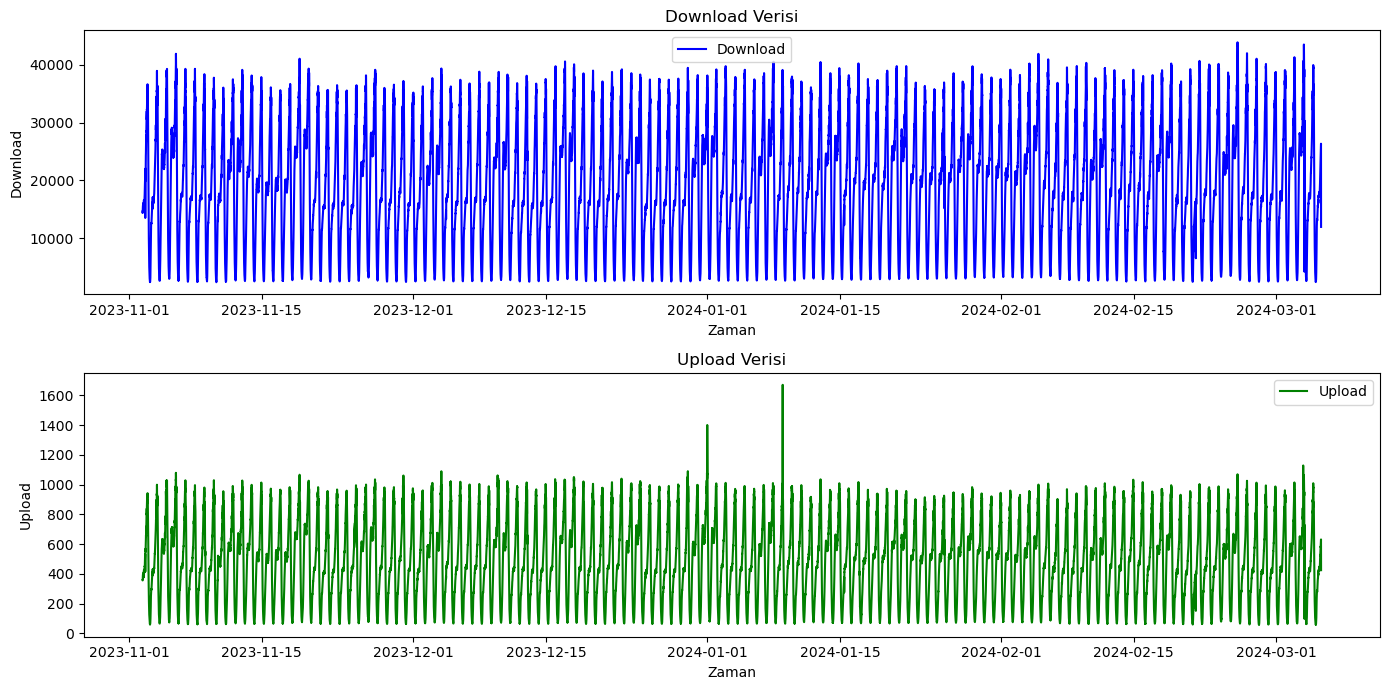

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib ayarları
plt.figure(figsize=(14, 7))

# Download verisinin görselleştirilmesi
plt.subplot(2, 1, 1)
plt.plot(data['TIME_STAMP'], data['DOWNLOAD'], label='Download', color='blue')
plt.title('Download Verisi')
plt.xlabel('Zaman')
plt.ylabel('Download')
plt.legend()

# Upload verisinin görselleştirilmesi
plt.subplot(2, 1, 2)
plt.plot(data['TIME_STAMP'], data['UPLOAD'], label='Upload', color='green')
plt.title('Upload Verisi')
plt.xlabel('Zaman')
plt.ylabel('Upload')
plt.legend()

plt.tight_layout()
plt.savefig('Upload-Download_zamana bagli.png')
plt.show()


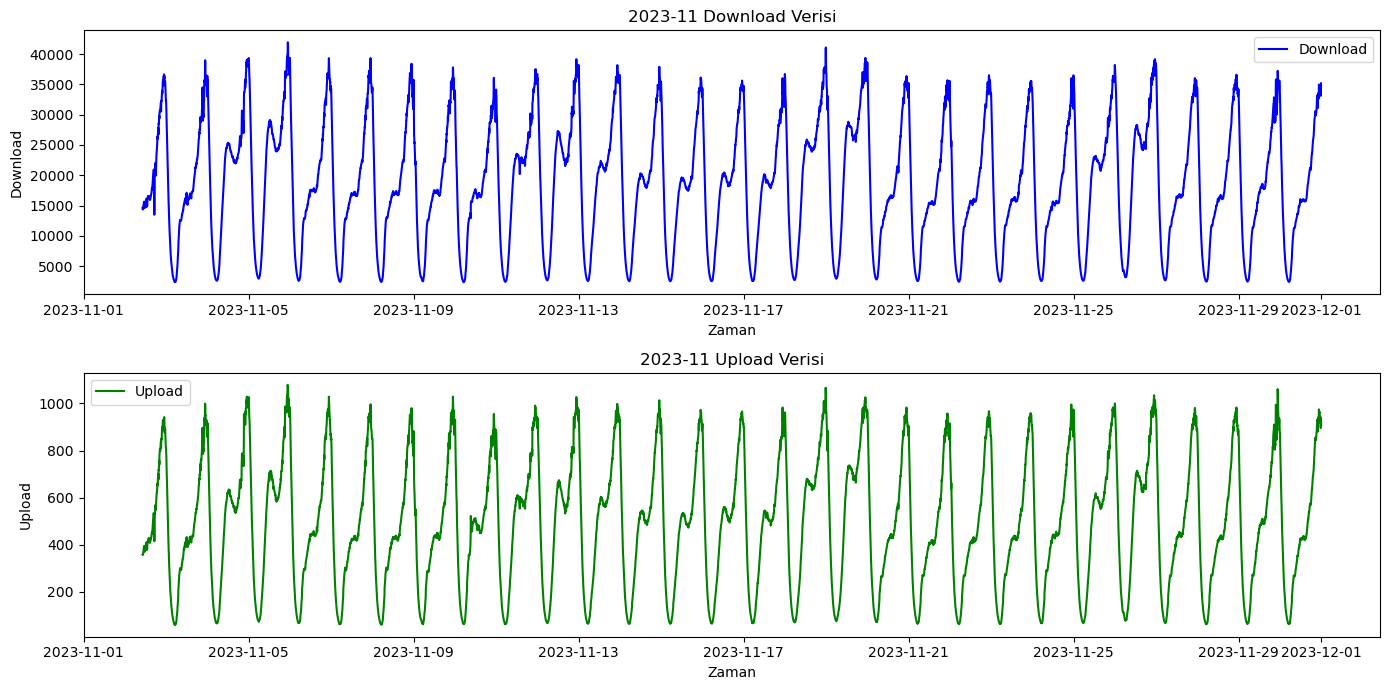

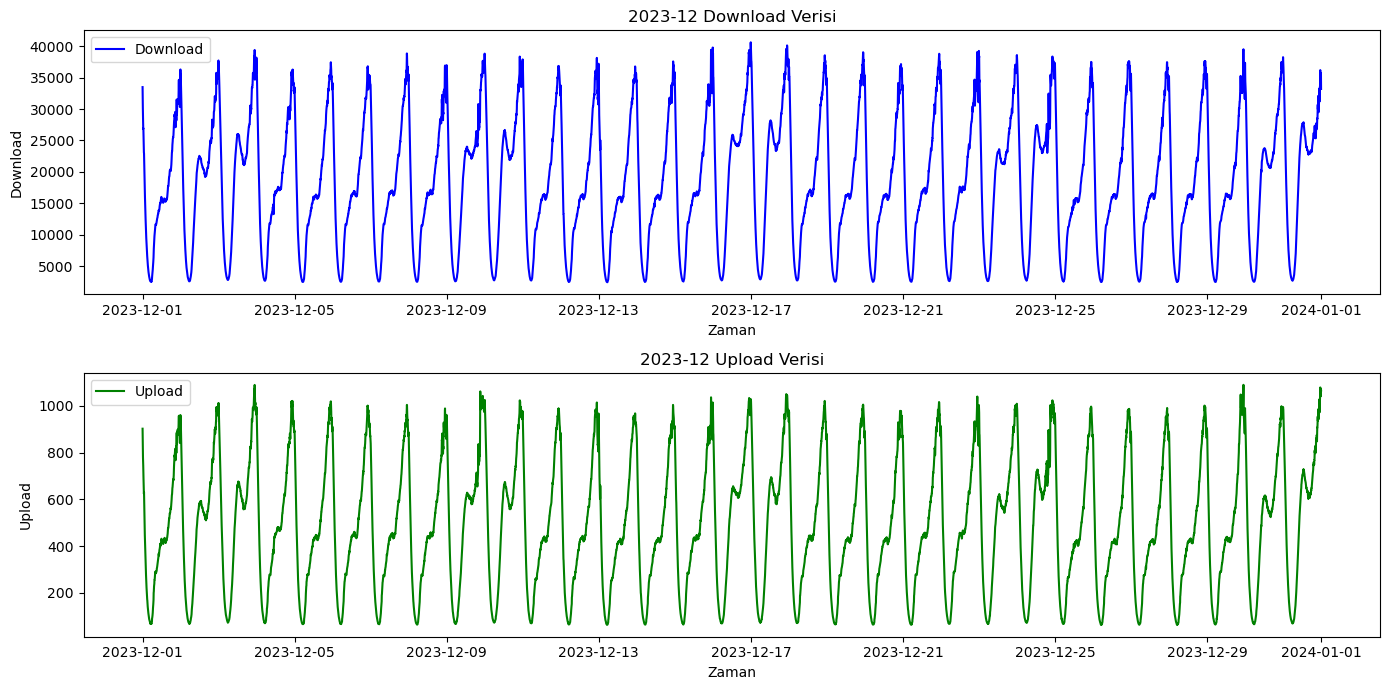

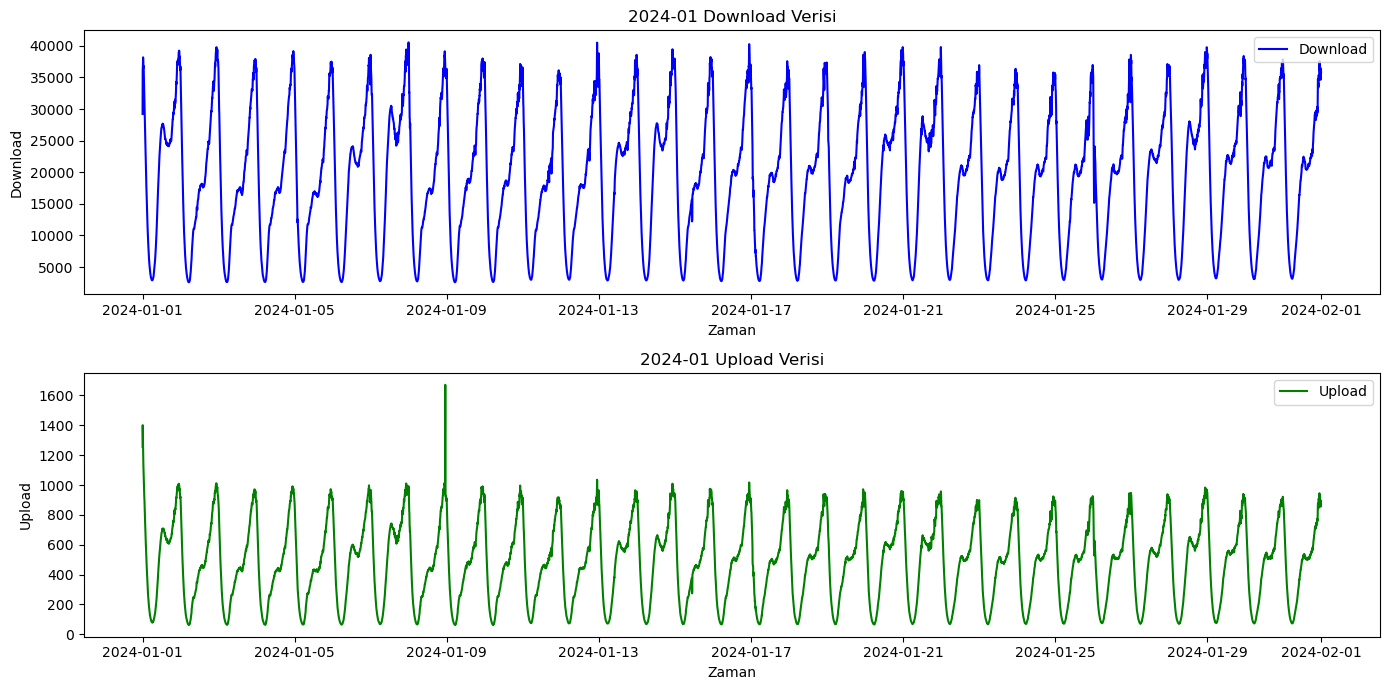

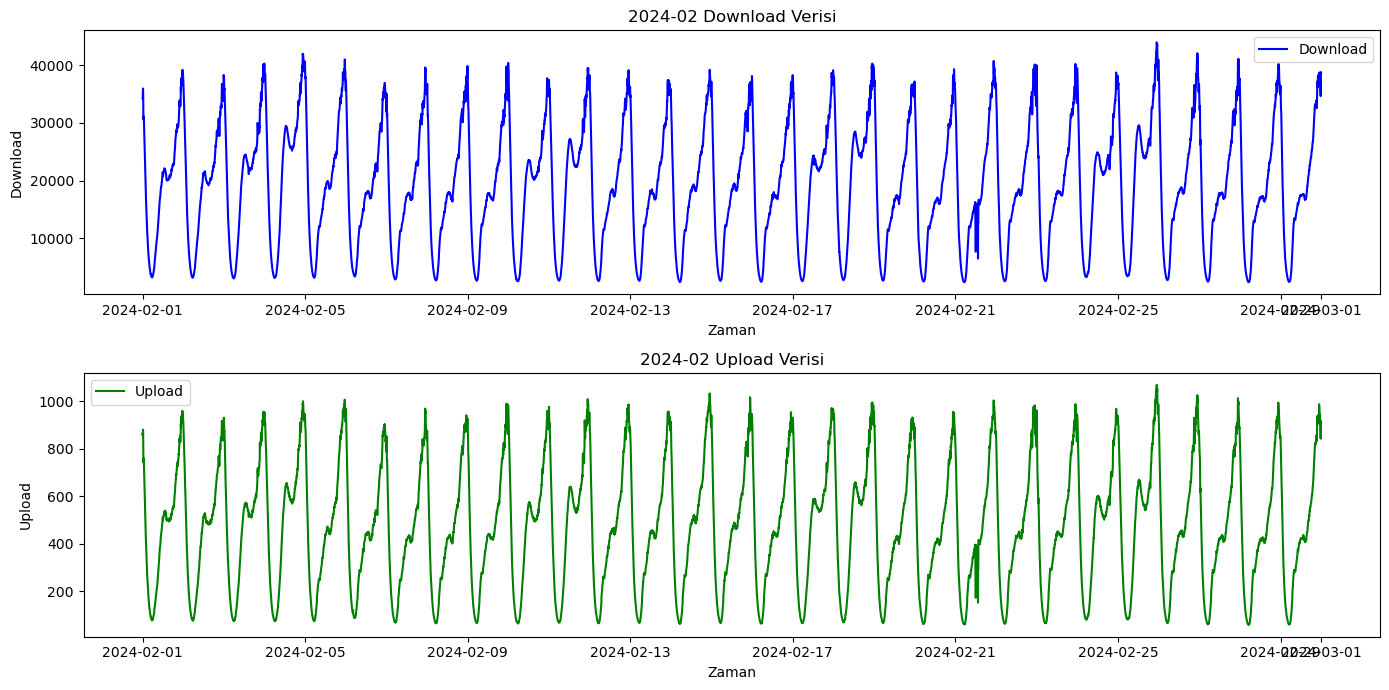

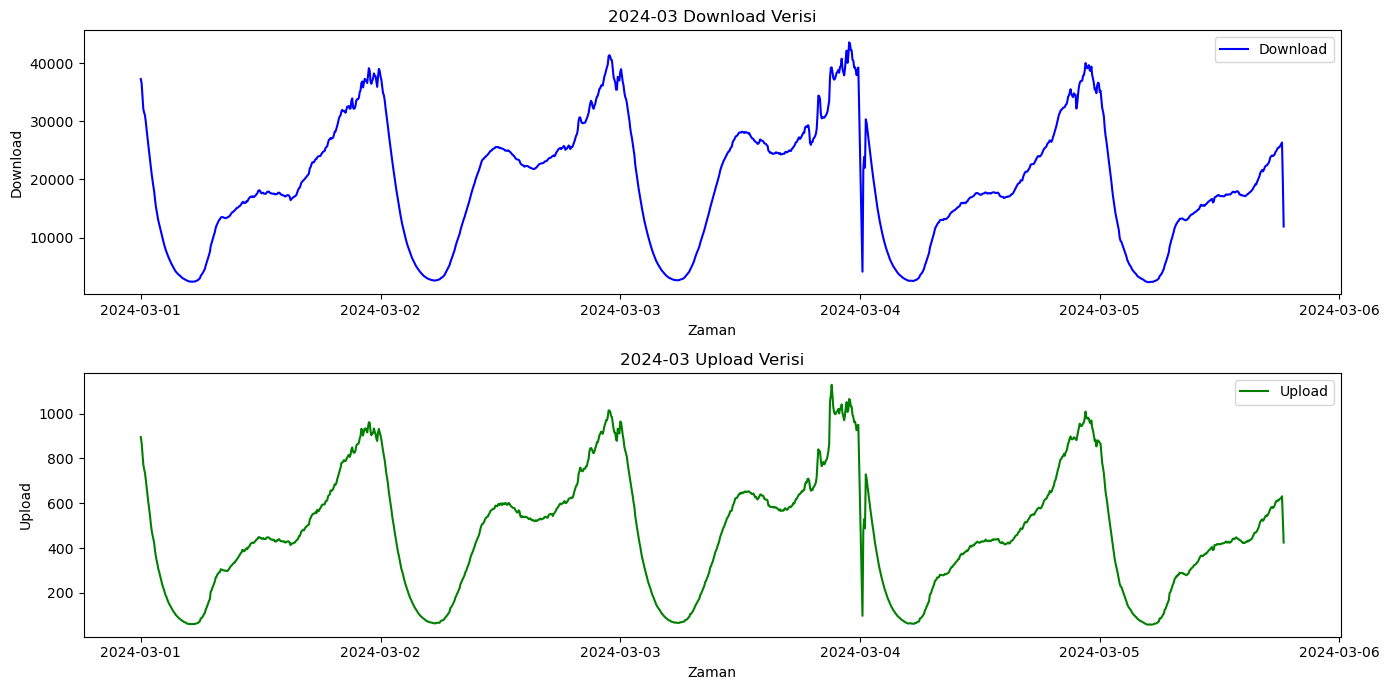

In [11]:
# Ay bazında gruplandırma
data['YearMonth'] = data['TIME_STAMP'].dt.to_period('M')

# Ay bazında veriyi gruplandırma
grouped_data = data.groupby('YearMonth')

# Her ay için ayrı grafik çizme
for period, group in grouped_data:
    plt.figure(figsize=(14, 7))

    plt.subplot(2, 1, 1)
    plt.plot(group['TIME_STAMP'], group['DOWNLOAD'], label='Download', color='blue')
    plt.title(f'{period} Download Verisi')
    plt.xlabel('Zaman')
    plt.ylabel('Download')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(group['TIME_STAMP'], group['UPLOAD'], label='Upload', color='green')
    plt.title(f'{period} Upload Verisi')
    plt.xlabel('Zaman')
    plt.ylabel('Upload')
    plt.legend()

    plt.tight_layout()
    plt.savefig('Upload-Download_aylik_zamana bagli.png')
    plt.show()
 

In [13]:
data['YearMonth'].value_counts()

YearMonth
2023-12    8928
2024-01    8928
2024-02    8352
2023-11    8230
2024-03    1374
Freq: M, Name: count, dtype: int64

In [14]:
data.set_index('TIME_STAMP', inplace=True)

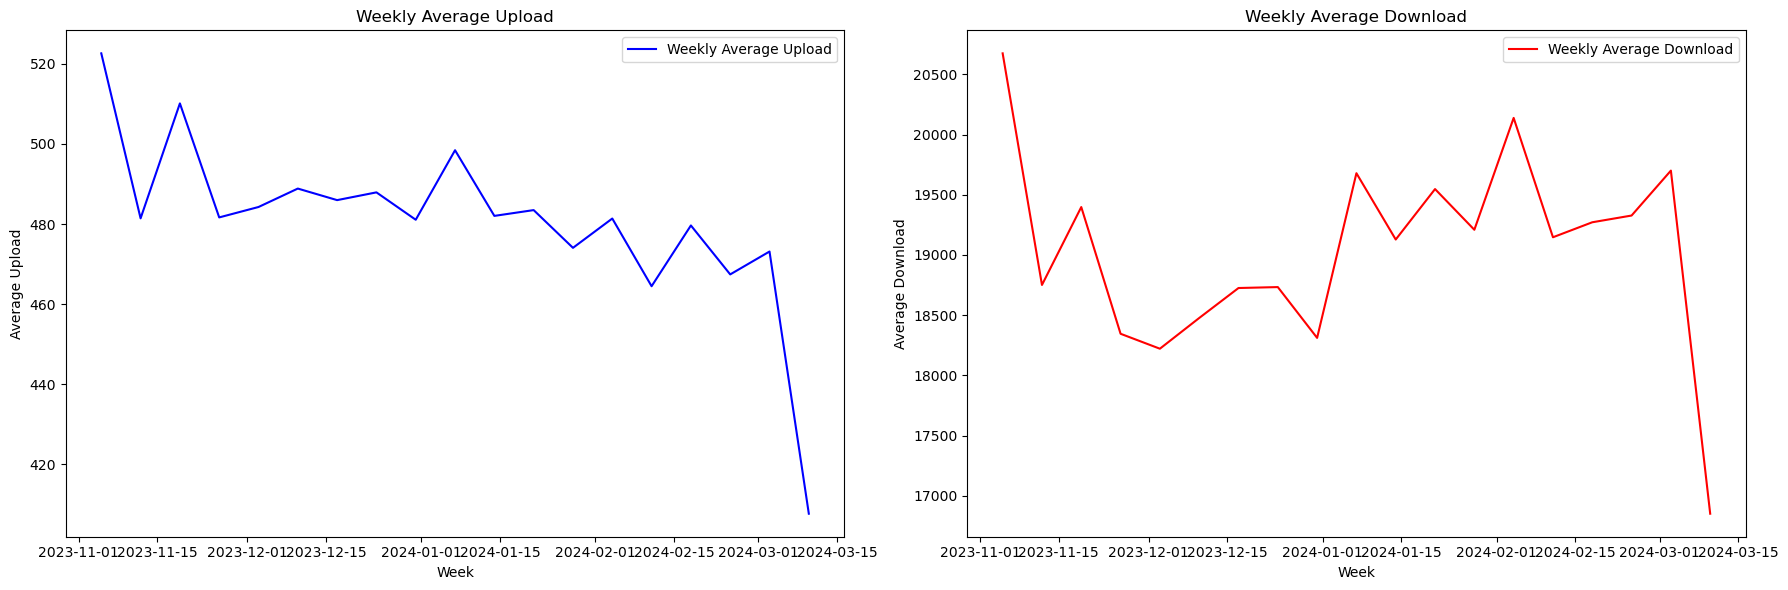

In [15]:
# Yeni DataFrame Oluşturma: İlk Sütunu Kaldırarak Kopyalama
data_new = data.copy()


data_new.drop(columns=[data.columns[0]], inplace=True)


# Haftalık Ortalamalar Hesaplama
data_resampled = data_new.resample('W').mean()


# Grafiklerin Oluşturulması
plt.figure(figsize=(18, 6))

# Upload Grafik
plt.subplot(1, 2, 1)
plt.plot(data_resampled.index, data_resampled['UPLOAD'], color='blue', label='Weekly Average Upload')
plt.xlabel('Week')
plt.ylabel('Average Upload')
plt.title('Weekly Average Upload')
plt.legend()

# Download Grafik
plt.subplot(1, 2, 2)
plt.plot(data_resampled.index, data_resampled['DOWNLOAD'], color='red', label='Weekly Average Download')
plt.xlabel('Week')
plt.ylabel('Average Download')
plt.title('Weekly Average Download')
plt.legend()

plt.tight_layout()
plt.savefig('Weekly Average Download-Upload.png')
plt.show()


C:\Users\kerim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kerim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


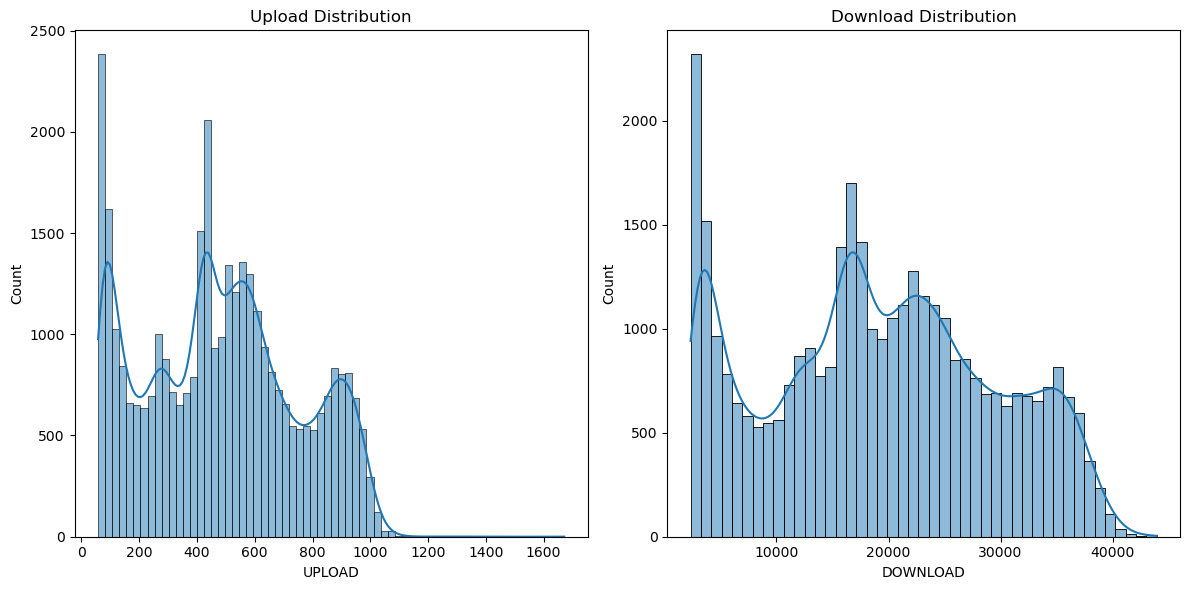

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['UPLOAD'], kde=True)
plt.title('Upload Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['DOWNLOAD'], kde=True)
plt.title('Download Distribution')


plt.tight_layout()
plt.savefig('Download-Upload Distribution.png')
plt.show()

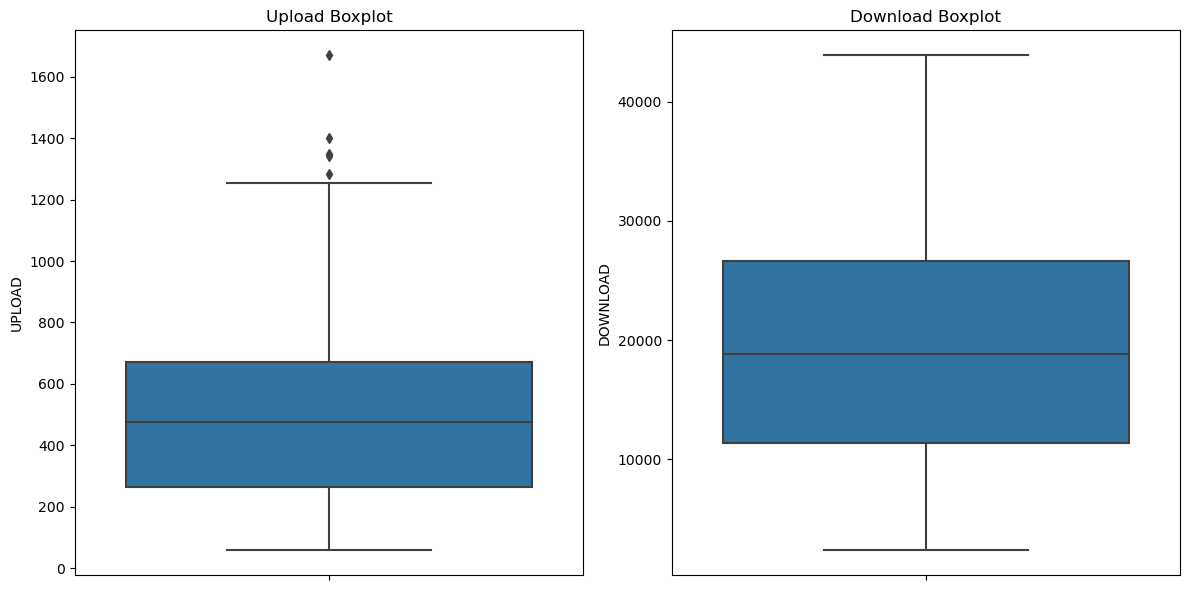

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['UPLOAD'])
plt.title('Upload Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['DOWNLOAD'])
plt.title('Download Boxplot')

plt.tight_layout()
plt.savefig('Download-Upload Boxplot.png')
plt.show()

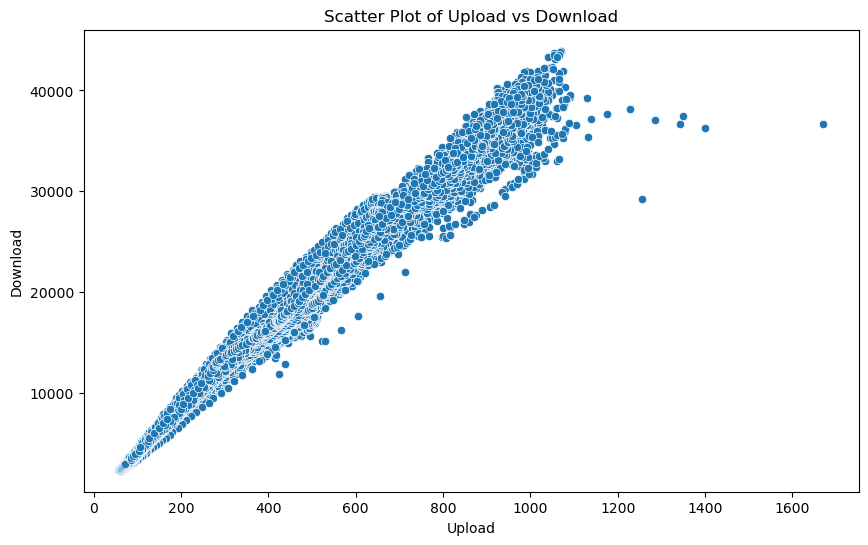

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['UPLOAD'], y=data['DOWNLOAD'])
plt.xlabel('Upload')
plt.ylabel('Download')
plt.title('Scatter Plot of Upload vs Download')
plt.show()
plt.savefig('Scatter Plot of Upload vs Download.png')

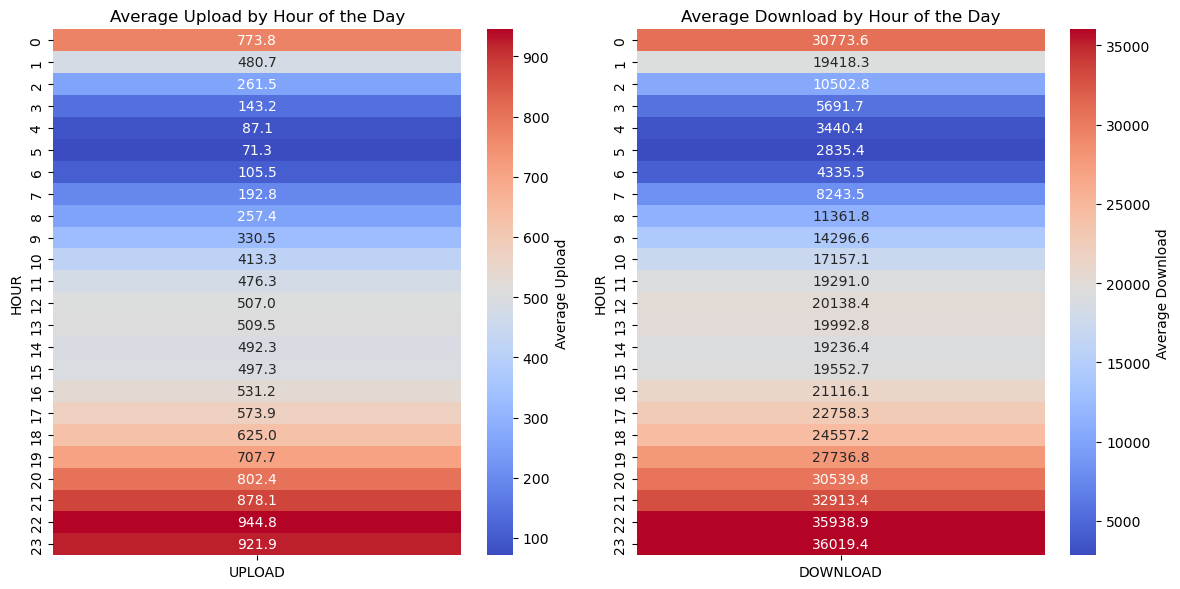

In [18]:
# Günün Saatlerine Göre Ortalama Hesaplama
data['HOUR'] = data.index.hour

# Upload için Pivot Table
heatmap_data_upload = data.pivot_table(index='HOUR', values='UPLOAD', aggfunc='mean')

# Download için Pivot Table
heatmap_data_download = data.pivot_table(index='HOUR', values='DOWNLOAD', aggfunc='mean')

# Grafiklerin Oluşturulması
plt.figure(figsize=(12, 6))

# Upload Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data_upload, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Average Upload'})
plt.title('Average Upload by Hour of the Day')

# Download Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data_download, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Average Download'})
plt.title('Average Download by Hour of the Day')

plt.tight_layout()
plt.savefig('Average Download-Upload by Hour of the Day.png')
plt.show()

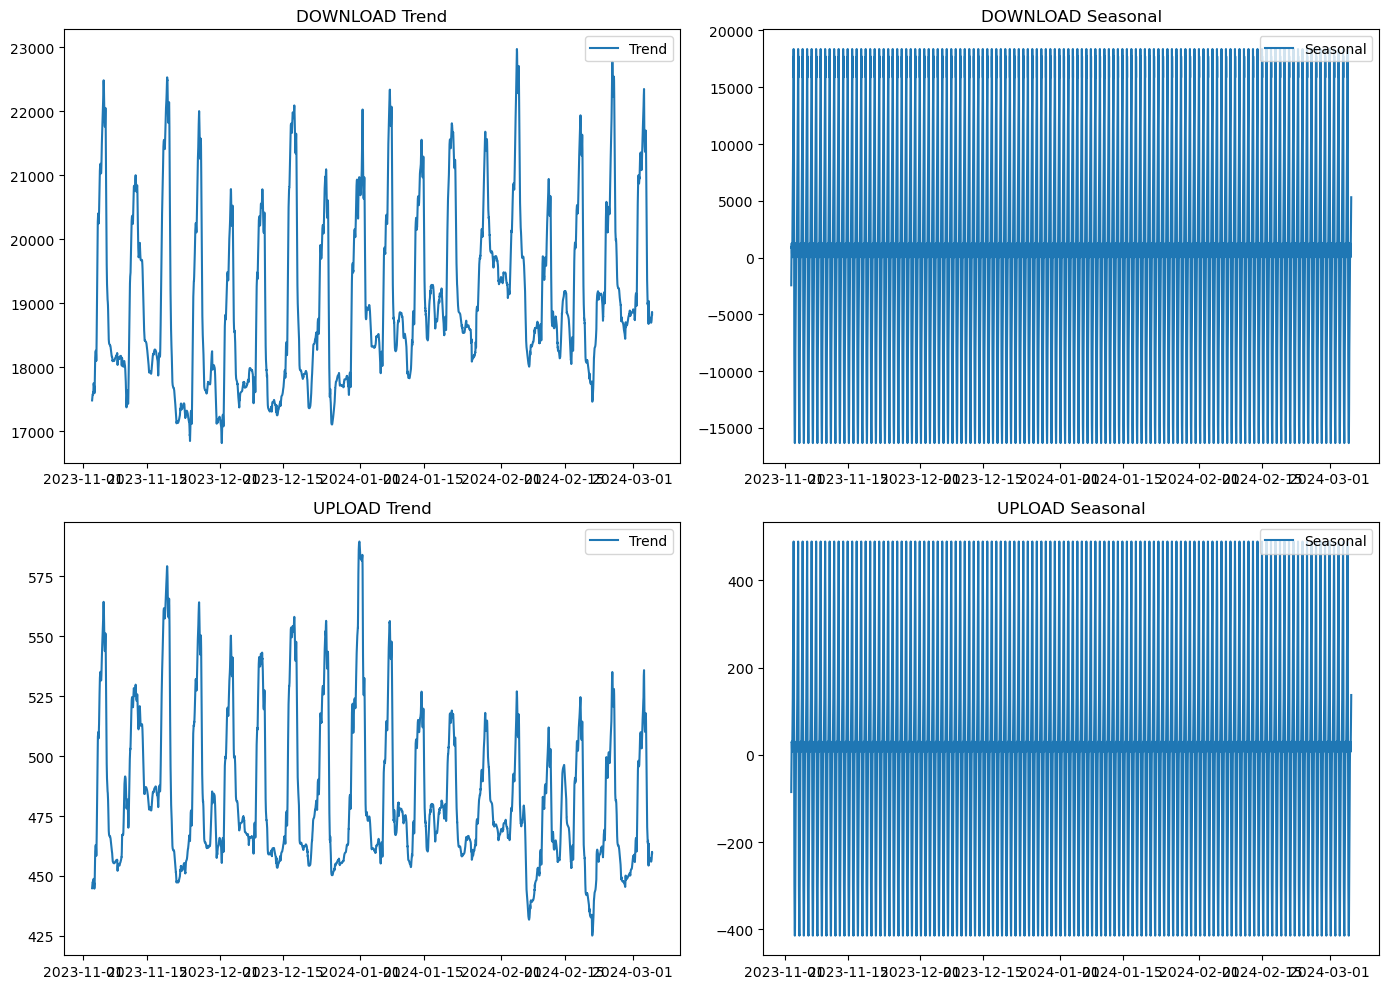

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Zaman serisi analizi
result_download = seasonal_decompose(data['DOWNLOAD'], model='additive', period=24*60//5)
result_upload = seasonal_decompose(data['UPLOAD'], model='additive', period=24*60//5)

# Grafiklerin çizilmesi
plt.figure(figsize=(14, 10))

# DOWNLOAD verisinin analizi
plt.subplot(2, 2, 1)
plt.plot(result_download.trend, label='Trend')
plt.title('DOWNLOAD Trend')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(result_download.seasonal, label='Seasonal')
plt.title('DOWNLOAD Seasonal')
plt.legend()

# UPLOAD verisinin analizi
plt.subplot(2, 2, 3)
plt.plot(result_upload.trend, label='Trend')
plt.title('UPLOAD Trend')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(result_upload.seasonal, label='Seasonal')
plt.title('UPLOAD Seasonal')
plt.legend()

plt.tight_layout()
plt.show()

# Feature Engineering

In [19]:
# Hafta içi/sonu ve saat, dakika gibi özellikleri ekleme
data['WEEKDAY'] = data.index.weekday
data['HOUR'] = data.index.hour
data['MINUTE'] = data.index.minute

# Hafta sonu olup olmadığını belirleme
data['is_WEEKEND'] = data['WEEKDAY'].apply(lambda x: 1 if x >= 5 else 0)

# Bayram günlerini belirleme (Örneğin Türkiye bayram günleri)
# Bu günleri elle girmeniz veya bir bayram günleri listesinden çekmeniz gerekebilir
bayram_gunleri = [
    '2024-01-01',  # Yılbaşı
    '2024-04-23',  # Ulusal Egemenlik ve Çocuk Bayramı
    '2024-05-01',  # Emek ve Dayanışma Günü
    '2024-05-19',  # Atatürk'ü Anma, Gençlik ve Spor Bayramı
    '2024-07-15',  # Demokrasi ve Milli Birlik Günü
    '2024-08-30',  # Zafer Bayramı
    '2024-10-29',  # Cumhuriyet Bayramı
    '2024-04-09',  # Ramazan Bayramı Arife
    '2024-04-10',  # Ramazan Bayramı 1. Gün
    '2024-04-11',  # Ramazan Bayramı 2. Gün
    '2024-04-12',  # Ramazan Bayramı 3. Gün
    '2024-06-16',  # Kurban Bayramı Arife
    '2024-06-17',  # Kurban Bayramı 1. Gün
    '2024-06-18',  # Kurban Bayramı 2. Gün
    '2024-06-19',  # Kurban Bayramı 3. Gün
    '2024-06-20',  # Kurban Bayramı 4. Gün
]

# Bayram günlerini belirlemek için index tarihlerini kullanma
data['Holiday'] = data.index.strftime('%Y-%m-%d').isin(bayram_gunleri).astype(int)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35812 entries, 2023-11-02 10:10:00 to 2024-03-05 18:25:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   SERVER_NAME  35812 non-null  object   
 1   DOWNLOAD     35812 non-null  float64  
 2   UPLOAD       35812 non-null  float64  
 3   YearMonth    35812 non-null  period[M]
 4   HOUR         35812 non-null  int32    
 5   WEEKDAY      35812 non-null  int32    
 6   MINUTE       35812 non-null  int32    
 7   is_WEEKEND   35812 non-null  int64    
 8   Holiday      35812 non-null  int32    
dtypes: float64(2), int32(4), int64(1), object(1), period[M](1)
memory usage: 2.2+ MB


In [21]:
data.describe()

,DOWNLOAD,UPLOAD,HOUR,WEEKDAY,MINUTE,is_WEEKEND,Holiday
count,35812.000000,35812.000000,35812.000000,35812.000000,35812.000000,35812.000000,35812.000000
mean,19080.238244,482.759298,11.506534,3.011728,27.498883,0.289512,0.008042
std,10211.705470,267.886128,6.914905,2.009410,17.259964,0.453542,0.089317
min,2335.885000,57.749000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11381.674000,265.042000,6.000000,1.000000,13.750000,0.000000,0.000000
50%,18853.041500,477.011000,12.000000,3.000000,25.000000,0.000000,0.000000
75%,26662.892750,669.970500,17.000000,5.000000,40.000000,1.000000,0.000000
max,43930.614000,1670.995000,23.000000,6.000000,55.000000,1.000000,1.000000


In [22]:
data['Holiday'].value_counts()

Holiday
0    35524
1      288
Name: count, dtype: int64

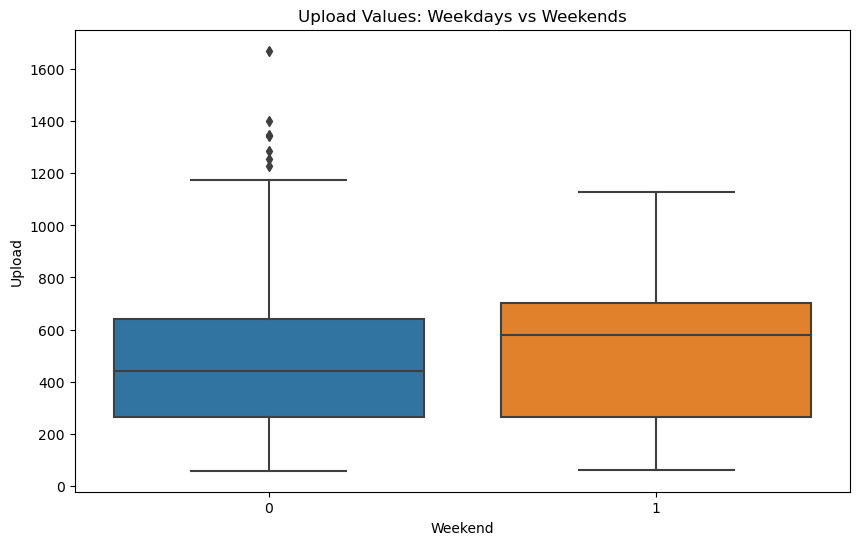

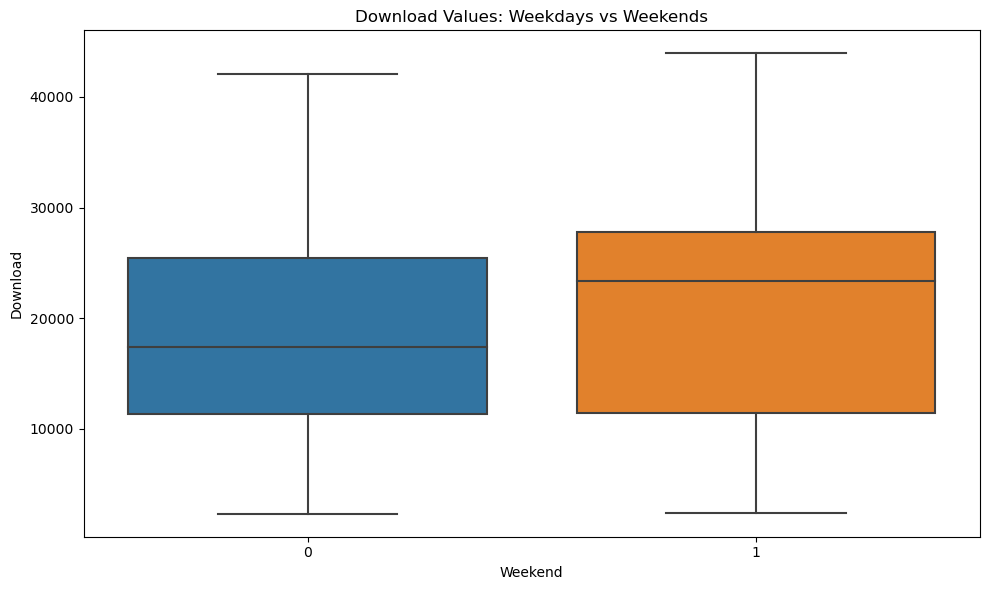

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_WEEKEND', y='UPLOAD', data=data)
plt.xlabel('Weekend')
plt.ylabel('Upload')
plt.title('Upload Values: Weekdays vs Weekends')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_WEEKEND', y='DOWNLOAD', data=data)
plt.xlabel('Weekend')
plt.ylabel('Download')
plt.title('Download Values: Weekdays vs Weekends')

plt.tight_layout()
plt.savefig('Upload-Download Values: Weekdays vs Weekends.png')
plt.show()

# Soru 1

In [25]:
timestamp_to_get = pd.Timestamp('2024-03-05 18:25:00')
row = data.loc[timestamp_to_get]
print(row)

SERVER_NAME    10.0.901.xx Server 1
DOWNLOAD                  11927.017
UPLOAD                        424.7
YearMonth                   2024-03
HOUR                             18
WEEKDAY                           1
MINUTE                           25
is_WEEKEND                        0
Holiday                           0
Name: 2024-03-05 18:25:00, dtype: object


In [26]:
# Belirli Zaman Damgasını Belirleme
timestamp_to_check = pd.Timestamp('2024-03-05 18:25:00')

# Belirli Zaman Damgasındaki Veriyi Alma
reference_row = data.loc[timestamp_to_check]

# Özelliklerin Çıkartılması
#reference_weekday = reference_row['WEEKDAY']
reference_hour = reference_row['HOUR']
reference_minute = reference_row['MINUTE']
reference_is_weekend = reference_row['is_WEEKEND']
reference_holiday = reference_row['Holiday']

# Benzer Özelliklere Sahip Diğer Verileri Filtreleme
filtered_data = data[
    #(data['WEEKDAY'] == reference_weekday) &
    (data['HOUR'] == reference_hour) &
    (data['MINUTE'] == reference_minute) &
    (data['is_WEEKEND'] == reference_is_weekend) &
    (data['Holiday'] == reference_holiday)
]

print(f"Zaman Damgası: {timestamp_to_check}")
print("Belirli Zaman Damgasındaki Özellikler:")
#print(f"WEEKDAY: {reference_weekday}")
print(f"HOUR: {reference_hour}")
print(f"MINUTE: {reference_minute}")
print(f"is_WEEKEND: {reference_is_weekend}")
print(f"Holiday: {reference_holiday}")

print("\nBenzer Özelliklere Sahip Diğer Veriler:")
print(filtered_data)

Zaman Damgası: 2024-03-05 18:25:00
Belirli Zaman Damgasındaki Özellikler:
HOUR: 18
MINUTE: 25
is_WEEKEND: 0
Holiday: 0

Benzer Özelliklere Sahip Diğer Veriler:
                              SERVER_NAME   DOWNLOAD   UPLOAD YearMonth  HOUR  \
TIME_STAMP                                                                      
2023-11-02 18:25:00  10.0.901.xx Server 1  24269.884  622.184   2023-11    18   
2023-11-03 18:25:00  10.0.901.xx Server 1  23908.871  604.232   2023-11    18   
2023-11-06 18:25:00  10.0.901.xx Server 1  23892.166  615.623   2023-11    18   
2023-11-07 18:25:00  10.0.901.xx Server 1  23187.248  595.677   2023-11    18   
2023-11-08 18:25:00  10.0.901.xx Server 1  23707.342  605.697   2023-11    18   
...                                   ...        ...      ...       ...   ...   
2024-02-28 18:25:00  10.0.901.xx Server 1  24781.181  592.263   2024-02    18   
2024-02-29 18:25:00  10.0.901.xx Server 1  25310.457  598.970   2024-02    18   
2024-03-01 18:25:00  10.0.901.

In [27]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88 entries, 2023-11-02 18:25:00 to 2024-03-05 18:25:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   SERVER_NAME  88 non-null     object   
 1   DOWNLOAD     88 non-null     float64  
 2   UPLOAD       88 non-null     float64  
 3   YearMonth    88 non-null     period[M]
 4   HOUR         88 non-null     int32    
 5   WEEKDAY      88 non-null     int32    
 6   MINUTE       88 non-null     int32    
 7   is_WEEKEND   88 non-null     int64    
 8   Holiday      88 non-null     int32    
dtypes: float64(2), int32(4), int64(1), object(1), period[M](1)
memory usage: 5.5+ KB


Evaluating IsolationForest...
Anomaly detected at index 2023-11-29 18:25:00:
  Download: 25626.949
  Upload: 683.981
  Z-Score (Download): 1.85
  Z-Score (Upload): 3.08
  Expected Range (Download): (20727.02246010835, 26783.742913385624)
  Expected Range (Upload): (530.8893648757288, 681.897382112223)
  Actual Value (Download): 25626.949
  Actual Value (Upload): 683.981

Anomaly detected at index 2024-01-02 18:25:00:
  Download: 26461.521
  Upload: 672.19
  Z-Score (Download): 2.68
  Z-Score (Upload): 2.61
  Expected Range (Download): (20727.02246010835, 26783.742913385624)
  Expected Range (Upload): (530.8893648757288, 681.897382112223)
  Actual Value (Download): 26461.521
  Actual Value (Upload): 672.19

Anomaly detected at index 2024-01-23 18:25:00:
  Download: 21973.965
  Upload: 544.138
  Z-Score (Download): -1.76
  Z-Score (Upload): -2.47
  Expected Range (Download): (20727.02246010835, 26783.742913385624)
  Expected Range (Upload): (530.8893648757288, 681.897382112223)
  Actual 

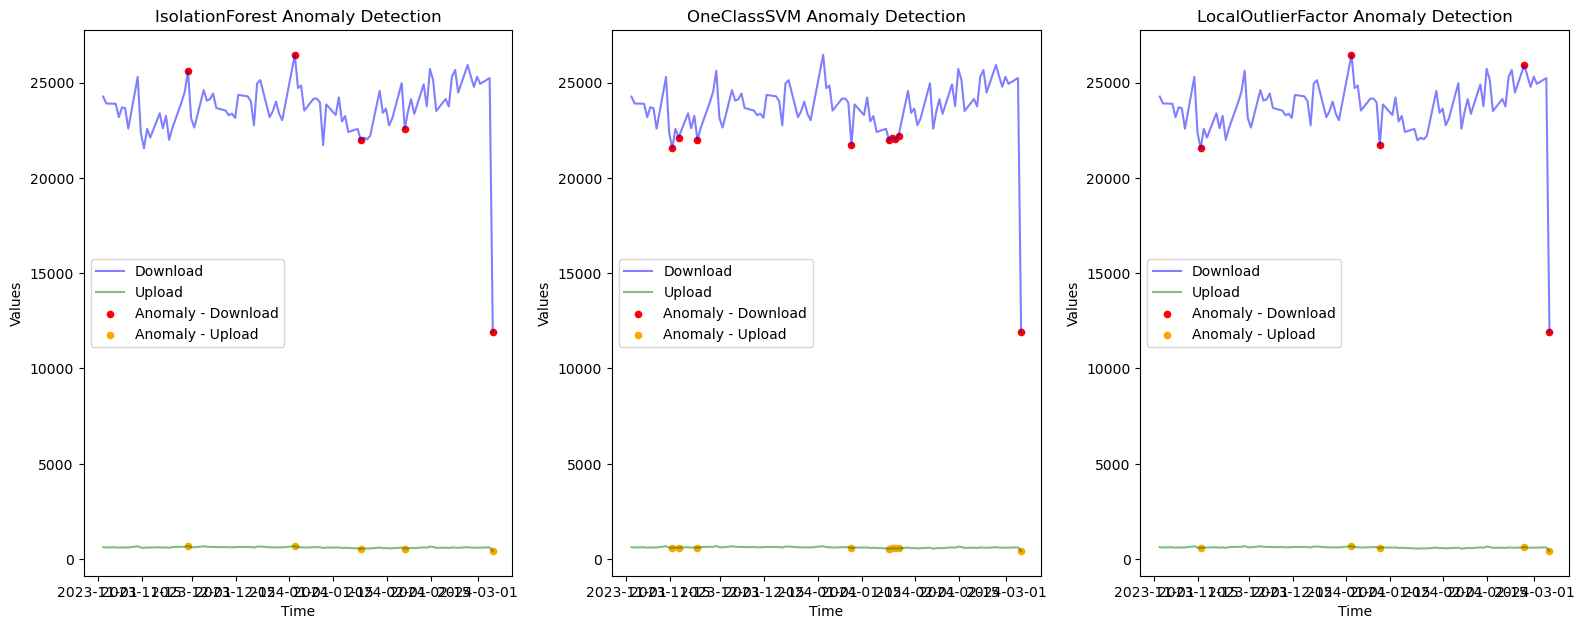

Anomaly Results:
IsolationForest:
  Anomaly Count: 5
OneClassSVM:
  Anomaly Count: 9
LocalOutlierFactor:
  Anomaly Count: 5


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

# Anomali Tespit Modelleri
models = {
    'IsolationForest': IsolationForest(),
    'OneClassSVM': OneClassSVM(),
    'LocalOutlierFactor': LocalOutlierFactor(),
}

# Parametreler
param_grids = {
    'IsolationForest': {'n_estimators': [50, 100], 'contamination': [0.05]},
    'OneClassSVM': {'nu': [0.1, 0.5], 'kernel': ['linear', 'rbf']},
    'LocalOutlierFactor': {'n_neighbors': [20, 50], 'contamination': [0.05]},
}

results = {}

# Grafiklerin Oluşturulması
plt.figure(figsize=(16, 12))

# Anomali Tespiti ve Performans
for idx, (model_name, model) in enumerate(models.items(), start=1):
    print(f"Evaluating {model_name}...")
    
    # Modelin Parametrelerini GridSearch ile Optimizasyon
    param_grid = param_grids.get(model_name, {})
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
        grid_search.fit(filtered_data[['DOWNLOAD', 'UPLOAD']])
        best_model = grid_search.best_estimator_
    else:
        best_model = model.fit(filtered_data[['DOWNLOAD', 'UPLOAD']])
    
    # Anomali Tespiti
    if model_name == 'LocalOutlierFactor':
        filtered_data['anomaly'] = best_model.fit_predict(filtered_data[['DOWNLOAD', 'UPLOAD']])
   
    else:
        filtered_data['anomaly'] = best_model.fit_predict(filtered_data[['DOWNLOAD', 'UPLOAD']])
    
    # Anomali Sayısını Hesaplama
    anomaly_count = np.sum(filtered_data['anomaly'] == -1)
    results[model_name] = {
        'anomaly_count': anomaly_count,
        'model': best_model
    }
    
    # Grafiklerin Oluşturulması
    plt.subplot(2, 3, idx)
    
    # Anomalileri Çizme
    anomalies = filtered_data[filtered_data['anomaly'] == -1]
    normal = filtered_data[filtered_data['anomaly'] != -1]
    
    plt.plot(filtered_data.index, filtered_data['DOWNLOAD'], label='Download', color='blue', alpha=0.5)
    plt.plot(filtered_data.index, filtered_data['UPLOAD'], label='Upload', color='green', alpha=0.5)
    plt.scatter(anomalies.index, anomalies['DOWNLOAD'], c='red', label='Anomaly - Download', s=20)
    plt.scatter(anomalies.index, anomalies['UPLOAD'], c='orange', label='Anomaly - Upload', s=20)
    
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f'{model_name} Anomaly Detection')
    plt.legend()

    # Anomali Nedenlerini Açıklama
    if not anomalies.empty:
        for idx, anomaly in anomalies.iterrows():
            print(f"Anomaly detected at index {idx}:")
            print(f"  Download: {anomaly['DOWNLOAD']}")
            print(f"  Upload: {anomaly['UPLOAD']}")
            
            # Normal dağılım ile karşılaştırma
            mean_download = normal['DOWNLOAD'].mean()
            std_download = normal['DOWNLOAD'].std()
            mean_upload = normal['UPLOAD'].mean()
            std_upload = normal['UPLOAD'].std()
            
            z_score_download = (anomaly['DOWNLOAD'] - mean_download) / std_download
            z_score_upload = (anomaly['UPLOAD'] - mean_upload) / std_upload
            
            print(f"  Z-Score (Download): {z_score_download:.2f}")
            print(f"  Z-Score (Upload): {z_score_upload:.2f}")
            
            # Beklenen Aralık
            download_range = (mean_download - 3 * std_download, mean_download + 3 * std_download)
            upload_range = (mean_upload - 3 * std_upload, mean_upload + 3 * std_upload)
            
            print(f"  Expected Range (Download): {download_range}")
            print(f"  Expected Range (Upload): {upload_range}")
            print(f"  Actual Value (Download): {anomaly['DOWNLOAD']}")
            print(f"  Actual Value (Upload): {anomaly['UPLOAD']}")
            print()

plt.tight_layout()
plt.savefig('Anomaly_detection_algorithms_results.png')
plt.show()

# Sonuçları Yazdırma
print("Anomaly Results:")
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Anomaly Count: {result['anomaly_count']}")

IslolationForest

Anomaly detected at index 2024-03-05 18:25:00:
Download: 11927.017
Upload: 424.7
Z-Score (Download): -11.72
Z-Score (Upload): -7.22
Expected Range (Download): (20727.02246010835, 26783.742913385624)
Expected Range (Upload): (530.8893648757288, 681.897382112223)
Actual Value (Download): 11927.017
Actual Value (Upload): 424.7


OneClassSVM

Anomaly detected at index 2024-03-05 18:25:00:
  Download: 11927.017
  Upload: 424.7
  Z-Score (Download): -12.72
  Z-Score (Upload): -6.94
  Expected Range (Download): (21120.09859296712, 26794.22140703288)
  Expected Range (Upload): (530.0507513240668, 690.5031474101106)
  Actual Value (Download): 11927.017
  Actual Value (Upload): 424.7


LocalOutlierFActor

Anomaly detected at index 2024-03-05 18:25:00:
  Download: 11927.017
  Upload: 424.7
  Z-Score (Download): -12.15
  Z-Score (Upload): -6.47
  Expected Range (Download): (20843.266847853287, 26691.062622026227)
  Expected Range (Upload): (522.1434960718396, 690.3997569402087)
  Actual Value (Download): 11927.017
  Actual Value (Upload): 424.7

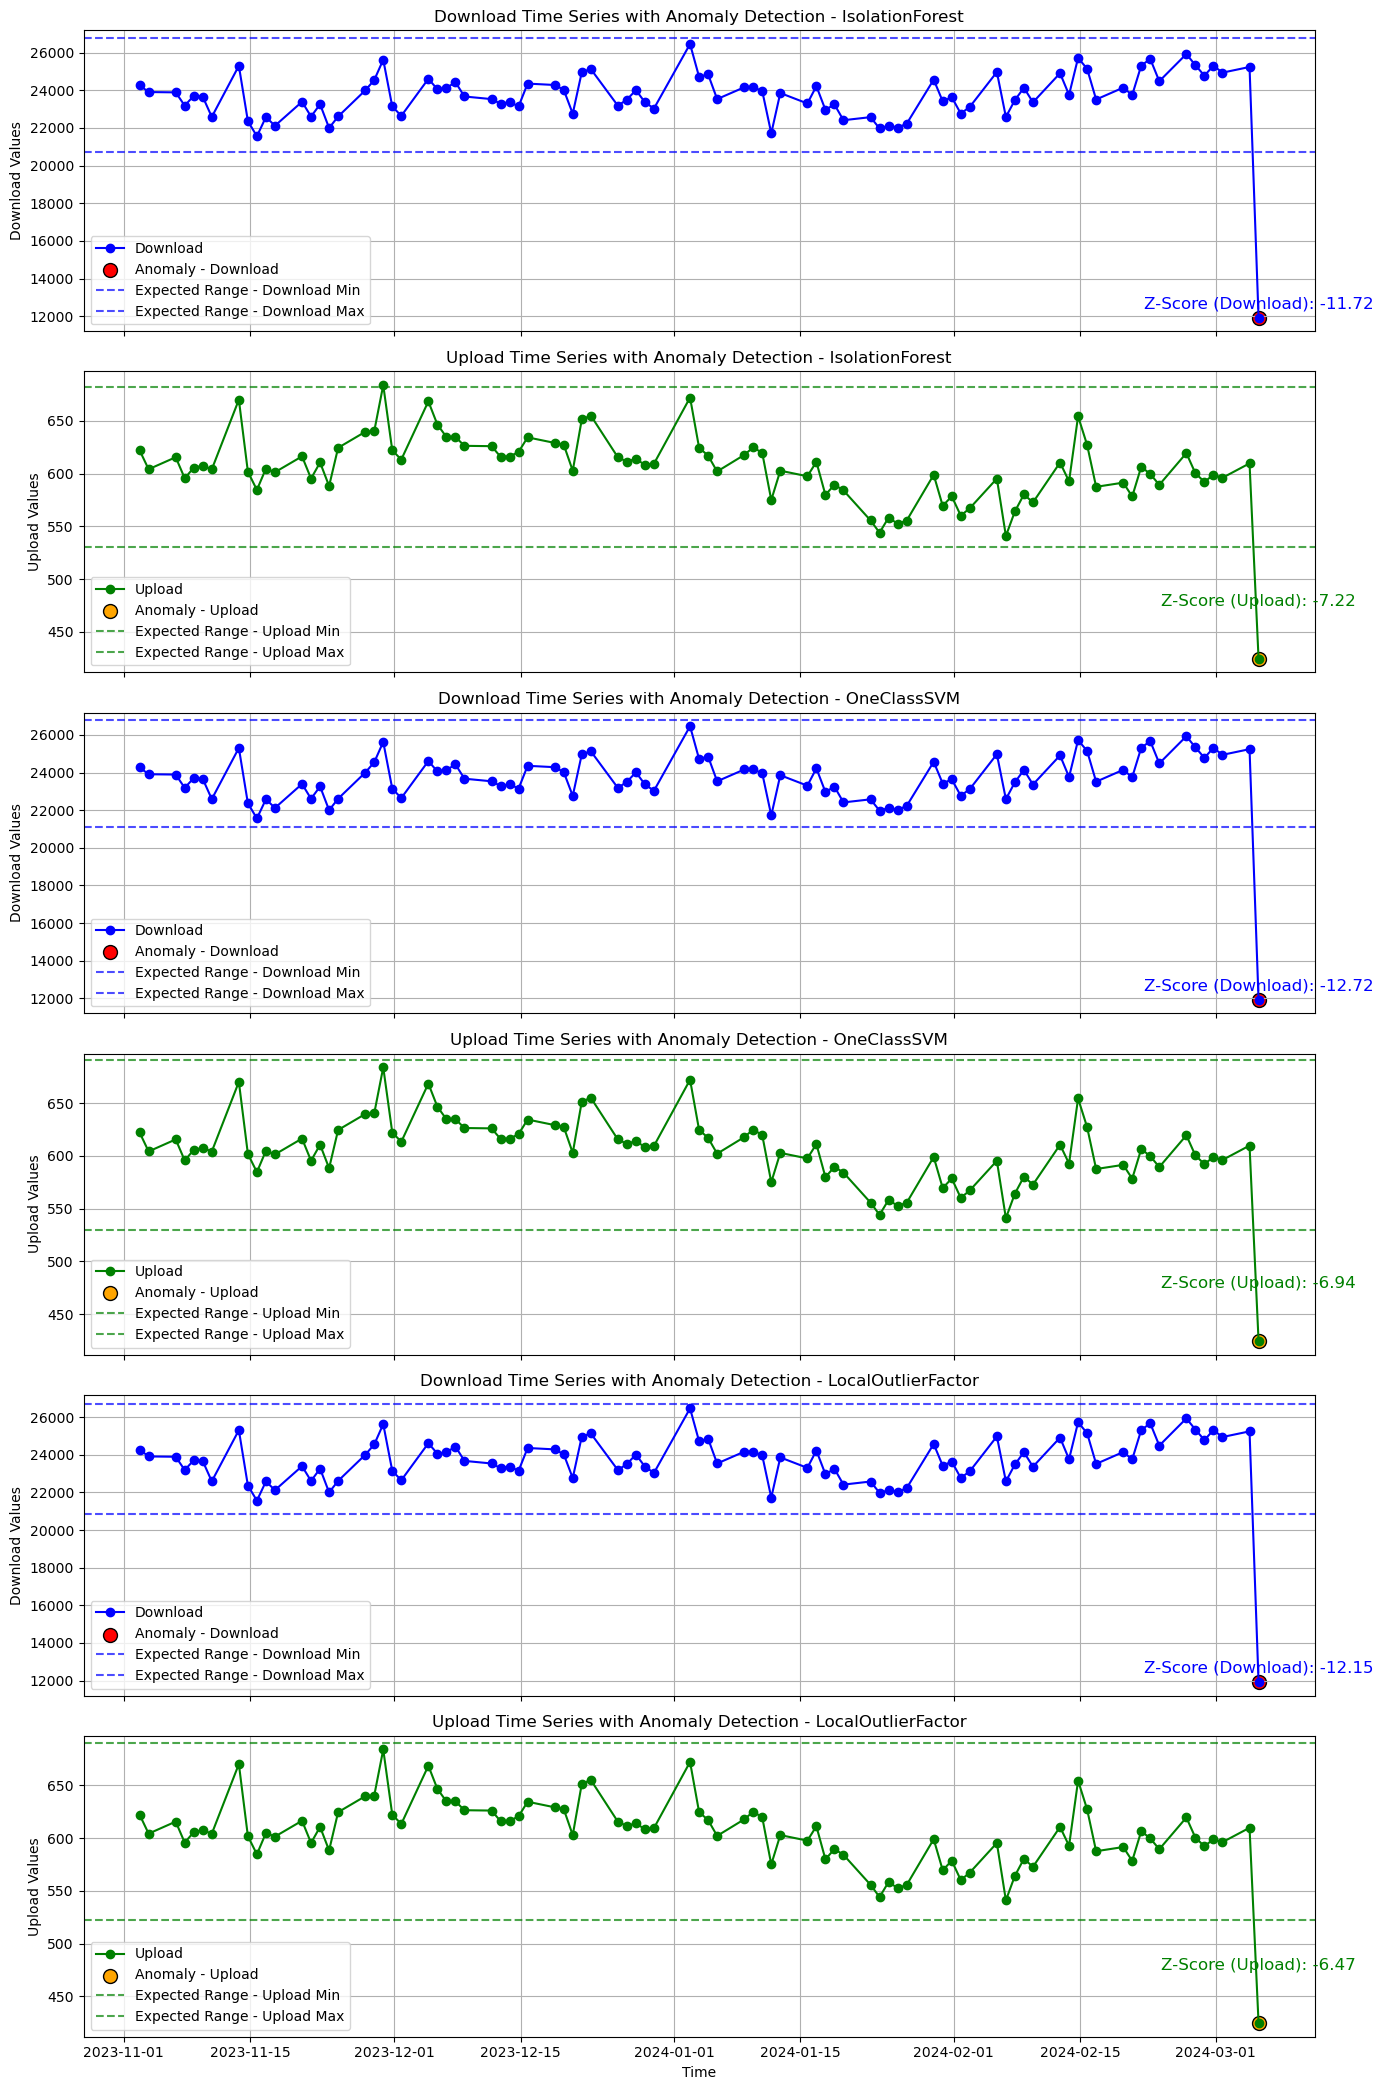

In [29]:

# Anomali bilgileri
anomaly_timestamp = pd.to_datetime('2024-03-05 18:25:00')
anomaly_download = 11927.017
anomaly_upload = 424.7

# Beklenen aralıklar ve Z-Score bilgileri
ranges_and_scores = {
    'IsolationForest': {
        'download': (20727.02246010835, 26783.742913385624),
        'upload': (530.8893648757288, 681.897382112223),
        'download_z': -11.72,
        'upload_z': -7.22
    },
    'OneClassSVM': {
        'download': (21120.09859296712, 26794.22140703288),
        'upload': (530.0507513240668, 690.5031474101106),
        'download_z': -12.72,
        'upload_z': -6.94
    },
    'LocalOutlierFactor': {
        'download': (20843.266847853287, 26691.062622026227),
        'upload': (522.1434960718396, 690.3997569402087),
        'download_z': -12.15,
        'upload_z': -6.47
    }
}

# Anomali model isimleri
models = ['IsolationForest', 'OneClassSVM', 'LocalOutlierFactor']

# Grafik oluşturma
fig, axs = plt.subplots(len(models) * 2, figsize=(14, 21), sharex=True)

for i, model in enumerate(models):
    # Grafikler: Download ve Upload için ayrı eksenler
    ax1 = axs[i * 2]
    ax2 = axs[i * 2 + 1]
    
    # Download verilerini çizme
    ax1.plot(filtered_data.index, filtered_data['DOWNLOAD'], label='Download', color='blue', marker='o')
    ax1.scatter(anomaly_timestamp, anomaly_download, color='red', s=100, edgecolor='black', label='Anomaly - Download')
    
    # Upload verilerini çizme
    ax2.plot(filtered_data.index, filtered_data['UPLOAD'], label='Upload', color='green', marker='o')
    ax2.scatter(anomaly_timestamp, anomaly_upload, color='orange', s=100, edgecolor='black', label='Anomaly - Upload')
    
    # Beklenen aralıkları çizme
    download_range = ranges_and_scores[model]['download']
    upload_range = ranges_and_scores[model]['upload']
    ax1.axhline(y=download_range[0], color='blue', linestyle='--', alpha=0.7, label='Expected Range - Download Min')
    ax1.axhline(y=download_range[1], color='blue', linestyle='--', alpha=0.7, label='Expected Range - Download Max')
    ax2.axhline(y=upload_range[0], color='green', linestyle='--', alpha=0.7, label='Expected Range - Upload Min')
    ax2.axhline(y=upload_range[1], color='green', linestyle='--', alpha=0.7, label='Expected Range - Upload Max')
    
    # Anomali Z-Score bilgilerini grafik üzerine ekleme
    ax1.text(anomaly_timestamp, anomaly_download + 500, f'Z-Score (Download): {ranges_and_scores[model]["download_z"]}', color='blue', fontsize=12, ha='center')
    ax2.text(anomaly_timestamp, anomaly_upload + 50, f'Z-Score (Upload): {ranges_and_scores[model]["upload_z"]}', color='green', fontsize=12, ha='center')

    # Download grafiği ayarları
    ax1.set_ylabel('Download Values')
    ax1.set_title(f'Download Time Series with Anomaly Detection - {model}')
    ax1.legend()
    ax1.grid(True)
    
    # Upload grafiği ayarları
    ax2.set_ylabel('Upload Values')
    ax2.set_title(f'Upload Time Series with Anomaly Detection - {model}')
    ax2.legend()
    ax2.grid(True)

# X ekseninin etiketlerini ayarlama
axs[-1].set_xlabel('Time')

plt.tight_layout()
plt.savefig('Download-Upload Time Series with Anomaly Detection.png')
plt.show()

# Soru 2

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35812 entries, 2023-11-02 10:10:00 to 2024-03-05 18:25:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   SERVER_NAME  35812 non-null  object   
 1   DOWNLOAD     35812 non-null  float64  
 2   UPLOAD       35812 non-null  float64  
 3   YearMonth    35812 non-null  period[M]
 4   HOUR         35812 non-null  int32    
 5   WEEKDAY      35812 non-null  int32    
 6   MINUTE       35812 non-null  int32    
 7   is_WEEKEND   35812 non-null  int64    
 8   Holiday      35812 non-null  int32    
dtypes: float64(2), int32(4), int64(1), object(1), period[M](1)
memory usage: 2.2+ MB


In [24]:
end_date = data.index.max()
start_date = end_date - pd.DateOffset(days=7)
recent_data = data[start_date:end_date]
train_data = data[:start_date]

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini DOWNLOAD için oluşturun ve eğitin
model_arima_download = ARIMA(train_data['DOWNLOAD'], order=(5, 1, 0))  # (p, d, q) parametreleri
model_fit_arima_download = model_arima_download.fit()

# DOWNLOAD için 10 gün ileriye tahmin yapın
forecast_arima_download = model_fit_arima_download.get_forecast(steps=2200)
forecast_arima_download_mean = forecast_arima_download.predicted_mean

# ARIMA modelini UPLOAD için oluşturun ve eğitin
model_arima_upload = ARIMA(train_data['UPLOAD'], order=(5, 1, 0))  # (p, d, q) parametreleri
model_fit_arima_upload = model_arima_upload.fit()

# UPLOAD için 10 gün ileriye tahmin yapın
forecast_arima_upload = model_fit_arima_upload.get_forecast(steps=2200)
forecast_arima_upload_mean = forecast_arima_upload.predicted_mean

# Tahminler için tarih aralığını oluşturun
forecast_dates = pd.date_range(start=recent_data.index[-1] + pd.DateOffset(minutes=5), periods=2200, freq='5T')

# Tahminleri DataFrame olarak tanımlayın
forecast_df_arima_download = pd.DataFrame(forecast_arima_download_mean, index=forecast_dates, columns=['ARIMA_Download_Forecast'])
forecast_df_arima_upload = pd.DataFrame(forecast_arima_upload_mean, index=forecast_dates, columns=['ARIMA_Upload_Forecast'])

# Tahminleri train_data ile birleştirin
forecast_results = pd.concat([forecast_df_arima_download, forecast_df_arima_upload], axis=1)


C:\Users\kerim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
C:\Users\kerim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
C:\Users\kerim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
C:\Users\kerim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
C:\Users\kerim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5min will b

C:\Users\kerim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
C:\Users\kerim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
C:\Users\kerim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
C:\Users\kerim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
C:\Users\kerim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5min will b

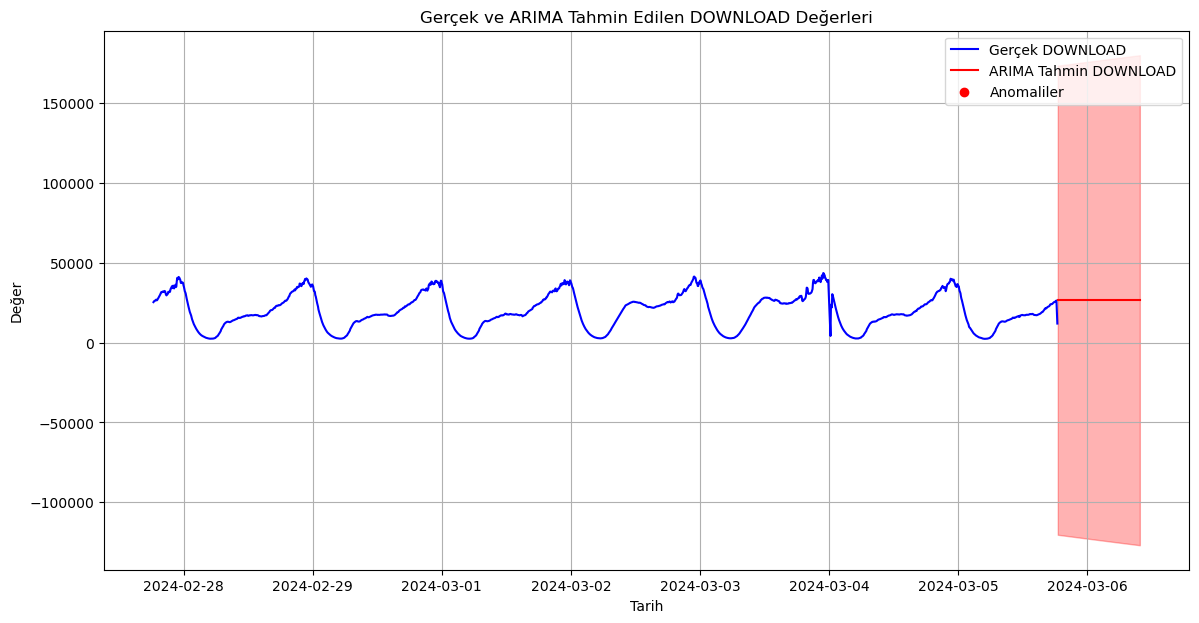

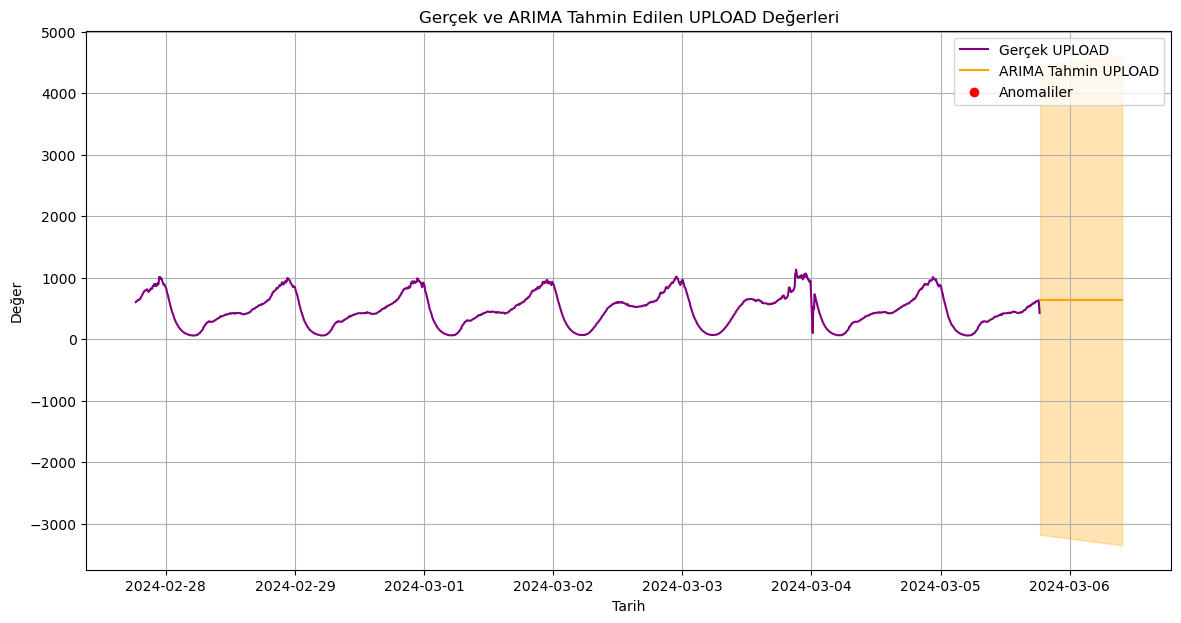

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini DOWNLOAD için oluşturun ve eğitin
model_arima_download = ARIMA(train_data['DOWNLOAD'], order=(5, 1, 0))  # (p, d, q) parametreleri
model_fit_arima_download = model_arima_download.fit()

# DOWNLOAD için 2200 adım ileriye tahmin yapın
forecast_arima_download = model_fit_arima_download.get_forecast(steps=2200)
forecast_arima_download_mean = forecast_arima_download.predicted_mean
forecast_arima_download_conf_int = forecast_arima_download.conf_int()

# ARIMA modelini UPLOAD için oluşturun ve eğitin
model_arima_upload = ARIMA(train_data['UPLOAD'], order=(5, 1, 0))  # (p, d, q) parametreleri
model_fit_arima_upload = model_arima_upload.fit()

# UPLOAD için 2200 adım ileriye tahmin yapın
forecast_arima_upload = model_fit_arima_upload.get_forecast(steps=2200)
forecast_arima_upload_mean = forecast_arima_upload.predicted_mean
forecast_arima_upload_conf_int = forecast_arima_upload.conf_int()

# Tahminler için tarih aralığını oluşturun
forecast_dates = pd.date_range(start=recent_data.index[-1] + pd.DateOffset(minutes=5), periods=2200, freq='5T')

# Tahminleri DataFrame olarak tanımlayın
forecast_df_arima_download = pd.DataFrame({
    'ARIMA_Download_Forecast': forecast_arima_download_mean,
    'ARIMA_Download_Forecast_Lower': forecast_arima_download_conf_int.iloc[:, 0],
    'ARIMA_Download_Forecast_Upper': forecast_arima_download_conf_int.iloc[:, 1]
}, index=forecast_dates)

forecast_df_arima_upload = pd.DataFrame({
    'ARIMA_Upload_Forecast': forecast_arima_upload_mean,
    'ARIMA_Upload_Forecast_Lower': forecast_arima_upload_conf_int.iloc[:, 0],
    'ARIMA_Upload_Forecast_Upper': forecast_arima_upload_conf_int.iloc[:, 1]
}, index=forecast_dates)

# Son 2017 satırı seçin
actual_data_2017 = actual_data.head(2017)
forecast_arima_download_2017 = forecast_df_arima_download.head(2017)
forecast_arima_upload_2017 = forecast_df_arima_upload.head(2017)

# Hata hesaplama
forecast_arima_download_2017['Actual'] = actual_data_2017['DOWNLOAD'].values
forecast_arima_download_2017['Error'] = forecast_arima_download_2017['ARIMA_Download_Forecast'] - forecast_arima_download_2017['Actual']

forecast_arima_upload_2017['Actual'] = actual_data_2017['UPLOAD'].values
forecast_arima_upload_2017['Error'] = forecast_arima_upload_2017['ARIMA_Upload_Forecast'] - forecast_arima_upload_2017['Actual']

# Eşik belirleme
threshold_multiplier = 3  # Eşik değeri için çarpan (örneğin, 3x standart sapma)
arima_download_threshold = forecast_arima_download_2017['Error'].std() * threshold_multiplier
arima_upload_threshold = forecast_arima_upload_2017['Error'].std() * threshold_multiplier

# Anomali tespiti
forecast_arima_download_2017['Anomaly'] = np.abs(forecast_arima_download_2017['Error']) > arima_download_threshold
forecast_arima_upload_2017['Anomaly'] = np.abs(forecast_arima_upload_2017['Error']) > arima_upload_threshold

# DOWNLOAD için grafiği oluşturun ve kaydedin
plt.figure(figsize=(14, 7))

# Gerçek DOWNLOAD değerleri
plt.plot(recent_data.index, recent_data['DOWNLOAD'], label='Gerçek DOWNLOAD', color='blue')

# ARIMA tahminleri
plt.plot(forecast_df_arima_download.index, forecast_df_arima_download['ARIMA_Download_Forecast'], label='ARIMA Tahmin DOWNLOAD', color='red')

# ARIMA tahminleri için güven aralıkları
plt.fill_between(forecast_df_arima_download.index, 
                 forecast_df_arima_download['ARIMA_Download_Forecast_Lower'], 
                 forecast_df_arima_download['ARIMA_Download_Forecast_Upper'], 
                 color='red', alpha=0.3)

# Anomali noktalarını işaretleme
anomalies_download = forecast_arima_download_2017[forecast_arima_download_2017['Anomaly']]
plt.scatter(anomalies_download.index, anomalies_download['Actual'], color='red', label='Anomaliler', zorder=5)

plt.xlabel('Tarih')
plt.ylabel('Değer')
plt.title('Gerçek ve ARIMA Tahmin Edilen DOWNLOAD Değerleri')
plt.legend()
plt.grid(True)
plt.savefig('arima_download_forecast.png')  # Grafik dosyasını kaydedin
plt.show()  # Grafiği göster

# UPLOAD için grafiği oluşturun ve kaydedin
plt.figure(figsize=(14, 7))

# Gerçek UPLOAD değerleri
plt.plot(recent_data.index, recent_data['UPLOAD'], label='Gerçek UPLOAD', color='purple')

# ARIMA tahminleri
plt.plot(forecast_df_arima_upload.index, forecast_df_arima_upload['ARIMA_Upload_Forecast'], label='ARIMA Tahmin UPLOAD', color='orange')

# ARIMA tahminleri için güven aralıkları
plt.fill_between(forecast_df_arima_upload.index, 
                 forecast_df_arima_upload['ARIMA_Upload_Forecast_Lower'], 
                 forecast_df_arima_upload['ARIMA_Upload_Forecast_Upper'], 
                 color='orange', alpha=0.3)

# Anomali noktalarını işaretleme
anomalies_upload = forecast_arima_upload_2017[forecast_arima_upload_2017['Anomaly']]
plt.scatter(anomalies_upload.index, anomalies_upload['Actual'], color='red', label='Anomaliler', zorder=5)

plt.xlabel('Tarih')
plt.ylabel('Değer')
plt.title('Gerçek ve ARIMA Tahmin Edilen UPLOAD Değerleri')
plt.legend()
plt.grid(True)
plt.savefig('arima_upload_forecast.png')  # Grafik dosyasını kaydedin
plt.show()  # Grafiği göster


In [51]:
import pandas as pd
import numpy as np

# Gerçek verileri ve tahmin verilerini yükleyin (örnek olarak)
# Burada kendi veri kaynaklarınızı kullanmalısınız
# actual_data = pd.read_csv('path_to_actual_data.csv', index_col='Date', parse_dates=True)
# forecast_arima_download = pd.read_csv('path_to_forecast_arima_download.csv', index_col='Date', parse_dates=True)
# forecast_arima_upload = pd.read_csv('path_to_forecast_arima_upload.csv', index_col='Date', parse_dates=True)

# Son 2200 satırdan son 2017 satırı seçin
actual_data = recent_data[['DOWNLOAD', 'UPLOAD']].copy()
forecast_arima_download = forecast_df_arima_download.copy()
forecast_arima_upload = forecast_df_arima_upload.copy()

# Son 2017 satırı seçin
actual_data_2017 = actual_data.head(2017)
forecast_arima_download_2017 = forecast_arima_download.head(2017)
forecast_arima_upload_2017 = forecast_arima_upload.head(2017)

# Hata hesaplama
# Tahminlerin ve gerçek değerlerin aynı tarih aralığında olduğundan emin olun
forecast_arima_download_2017['Actual'] = actual_data_2017['DOWNLOAD'].values
forecast_arima_download_2017['Error'] = forecast_arima_download_2017['ARIMA_Download_Forecast'] - forecast_arima_download_2017['Actual']

forecast_arima_upload_2017['Actual'] = actual_data_2017['UPLOAD'].values
forecast_arima_upload_2017['Error'] = forecast_arima_upload_2017['ARIMA_Upload_Forecast'] - forecast_arima_upload_2017['Actual']

# Eşik belirleme
# Basit bir yöntem: Ortalama hata ve standart sapma kullanarak eşik belirleme
threshold_multiplier = 3  # Eşik değeri için çarpan (örneğin, 3x standart sapma)
arima_download_threshold = forecast_arima_download_2017['Error'].std() * threshold_multiplier
arima_upload_threshold = forecast_arima_upload_2017['Error'].std() * threshold_multiplier

# Anomali tespiti
forecast_arima_download_2017['Anomaly'] = np.abs(forecast_arima_download_2017['Error']) > arima_download_threshold
forecast_arima_upload_2017['Anomaly'] = np.abs(forecast_arima_upload_2017['Error']) > arima_upload_threshold

# Sonuçları görüntüleyin
print(forecast_arima_download_2017[['Actual', 'ARIMA_Download_Forecast', 'Error', 'Anomaly']].head(20))
print(forecast_arima_upload_2017[['Actual', 'ARIMA_Upload_Forecast', 'Error', 'Anomaly']].head(20))


                        Actual  ARIMA_Download_Forecast        Error  Anomaly
2024-03-05 18:30:00  25336.105             26534.378342  1198.273342    False
2024-03-05 18:35:00  25719.477             26534.378342   814.901342    False
2024-03-05 18:40:00  26099.836             26534.378342   434.542342    False
2024-03-05 18:45:00  26076.397             26534.378342   457.981342    False
2024-03-05 18:50:00  26357.746             26534.378342   176.632342    False
2024-03-05 18:55:00  26623.458             26534.378342   -89.079658    False
2024-03-05 19:00:00  26923.088             26534.378342  -388.709658    False
2024-03-05 19:05:00  26475.283             26534.378342    59.095342    False
2024-03-05 19:10:00  26509.135             26534.378342    25.243342    False
2024-03-05 19:15:00  26952.718             26534.378342  -418.339658    False
2024-03-05 19:20:00  27471.353             26534.378342  -936.974658    False
2024-03-05 19:25:00  27968.178             26534.378342 -1433.79

C:\Users\kerim\AppData\Local\Temp\ipykernel_9016\3792981456.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_arima_download_2017['Actual'] = actual_data_2017['DOWNLOAD'].values
C:\Users\kerim\AppData\Local\Temp\ipykernel_9016\3792981456.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_arima_download_2017['Error'] = forecast_arima_download_2017['ARIMA_Download_Forecast'] - forecast_arima_download_2017['Actual']
C:\Users\kerim\AppData\Local\Temp\ipykernel_9016\3792981456.py:25: Setti

# Bonus Soru

In [35]:
# Saat dilimlerine göre gruplama
hourly_data = data.groupby('HOUR').agg({'DOWNLOAD': 'sum', 'UPLOAD': 'sum'})

# Saatlik toplamları ve ortalamaları hesaplama
hourly_totals = data.groupby('HOUR').agg({'DOWNLOAD': 'sum', 'UPLOAD': 'sum'})
hourly_averages = data.groupby('HOUR').agg({'DOWNLOAD': 'mean', 'UPLOAD': 'mean'})
hourly_data['TOTAL_TRAFFIC(SUM)'] = hourly_totals['DOWNLOAD'] + hourly_totals['UPLOAD']
hourly_data['TOTAL_TRAFFIC(AVG)'] = hourly_averages['DOWNLOAD'] + hourly_averages['UPLOAD']


# En yoğun saat dilimlerini belirleme
top_busy_hours_totals = hourly_data.sort_values(by='TOTAL_TRAFFIC(SUM)', ascending=False)
top_busy_hours_averages = hourly_data.sort_values(by='TOTAL_TRAFFIC(AVG)', ascending=False)

print("\nTop Busy Hours (Totals):")
print(top_busy_hours_totals)
print("\nTop Busy Hours (Averages):")
print(top_busy_hours_averages)


Top Busy Hours (Totals):
          DOWNLOAD        UPLOAD  TOTAL_TRAFFIC(SUM)  TOTAL_TRAFFIC(AVG)
HOUR                                                                    
23    5.359690e+07  1.371758e+06        5.496866e+07        36941.305295
22    5.347716e+07  1.405817e+06        5.488297e+07        36883.719169
21    4.897507e+07  1.306653e+06        5.028172e+07        33791.481569
0     4.579112e+07  1.151414e+06        4.694253e+07        31547.400816
20    4.544316e+07  1.193988e+06        4.663714e+07        31342.165981
19    4.127243e+07  1.052998e+06        4.232543e+07        28444.506700
18    3.668845e+07  9.337440e+05        3.762220e+07        25182.192884
17    3.413738e+07  8.609103e+05        3.499829e+07        23332.195187
16    3.167416e+07  7.968559e+05        3.247102e+07        21647.347065
12    3.020764e+07  7.605426e+05        3.096818e+07        20645.455970
13    2.998922e+07  7.642518e+05        3.075347e+07        20502.313427
15    2.932899e+07  7.459

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Saatlik toplamları ve ortalamaları hesaplama
hourly_totals = data.groupby('HOUR').agg({'DOWNLOAD': 'sum', 'UPLOAD': 'sum'})
hourly_averages = data.groupby('HOUR').agg({'DOWNLOAD': 'mean', 'UPLOAD': 'mean'})
hourly_data = pd.DataFrame({
    'TOTAL_TRAFFIC(SUM)': hourly_totals['DOWNLOAD'] + hourly_totals['UPLOAD'],
    'TOTAL_TRAFFIC(AVG)': hourly_averages['DOWNLOAD'] + hourly_averages['UPLOAD']
})

# En yoğun saat dilimlerini belirleme
top_busy_hours_totals = hourly_data.sort_values(by='TOTAL_TRAFFIC(SUM)', ascending=False)
top_busy_hours_averages = hourly_data.sort_values(by='TOTAL_TRAFFIC(AVG)', ascending=False)

print("\nTop Busy Hours (Totals):")
print(top_busy_hours_totals)
print("\nTop Busy Hours (Averages):")
print(top_busy_hours_averages)



Top Busy Hours (Totals):
      TOTAL_TRAFFIC(SUM)  TOTAL_TRAFFIC(AVG)
HOUR                                        
23          5.496866e+07        36941.305295
22          5.488297e+07        36883.719169
21          5.028172e+07        33791.481569
0           4.694253e+07        31547.400816
20          4.663714e+07        31342.165981
19          4.232543e+07        28444.506700
18          3.762220e+07        25182.192884
17          3.499829e+07        23332.195187
16          3.247102e+07        21647.347065
12          3.096818e+07        20645.455970
13          3.075347e+07        20502.313427
15          3.007493e+07        20049.955967
11          2.965092e+07        19767.276742
1           2.960982e+07        19899.072017
14          2.959292e+07        19728.610366
10          2.632047e+07        17570.407234
9           2.176501e+07        14627.020267
8           1.728937e+07        11619.202882
2           1.601731e+07        10764.321208
7           1.255308e+07     